In [23]:
import pandas as pd

tagwiki = pd.read_csv("C:/Users/arisa/StackOverflow-Project/dataset/tagwiki.csv")
tagwiki

,excerpt_last_edit_date,body_last_edit_date,excerpt,tag_name
0,1371244527,1450439435,A static library of object code in UNIX/Linux ...,.a
1,1353649971,1362982922,.app is an extension given to application bund...,.app
2,1342836577,1495770630,"A (typically short) shell script, executed whe...",.bash-profile
3,1339834647,1339828227,Class files are the format used by the Java Vi...,.class-file
4,1300892169,1528129773,A file extension for word processing documents...,.doc
...,...,...,...,...
20802,1389588485,1613551421,Ink: A Responsive Email Framework from ZURB,zurb-ink
20803,1473614421,1473614421,Use this tag for questions relating to Joyride...,zurb-joyride
20804,1323089468,1394720490,ZXing (pronounced &quot;zebra crossing&quot;) ...,zxing
20805,1512552477,1512578291,zxing.net is a library which supports decoding...,zxing.net


In [24]:
tagwiki[0:10]

,excerpt_last_edit_date,body_last_edit_date,excerpt,tag_name
0,1371244527,1450439435,A static library of object code in UNIX/Linux ...,.a
1,1353649971,1362982922,.app is an extension given to application bund...,.app
2,1342836577,1495770630,"A (typically short) shell script, executed whe...",.bash-profile
3,1339834647,1339828227,Class files are the format used by the Java Vi...,.class-file
4,1300892169,1528129773,A file extension for word processing documents...,.doc
5,1617010603,1558032584,Directory-level configuration file used by Apa...,.htaccess
6,1345913534,1358936145,.htpasswd is a flat-file used to store usernam...,.htpasswd
7,1322328476,1322328461,The ICO file format is an image file format fo...,.ico
8,1372262508,1372261117,.lib is standard extension for static librarie...,.lib
9,1366211538,1366211524,.mov is the file extension for QuickTime movies.,.mov


In [25]:
import nltk

grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[0])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
                 
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
#ดึง noun จาก 2 noun phrase
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN", "NNP"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags


find_noun_phrases(result)

('A', 'DT')
('static', 'JJ')
('of', 'IN')
('object', 'JJ')
('in', 'IN')
('that', 'WDT')
('can', 'MD')
('be', 'VB')
('used', 'VBN')
('by', 'IN')
('the', 'DT')
('to', 'TO')
('create', 'VB')
('an', 'DT')
('executable', 'JJ')
('.', '.')


['library', 'code', 'UNIX/Linux', 'link editor', 'program']

In [26]:
result.draw()

In [27]:
result.pprint()

(S
  A/DT
  static/JJ
  (NP library/NN)
  of/IN
  object/JJ
  (NP code/NN)
  in/IN
  (NP UNIX/Linux/NNP)
  that/WDT
  can/MD
  be/VB
  used/VBN
  by/IN
  the/DT
  (NP link/NN editor/NN)
  to/TO
  create/VB
  an/DT
  executable/JJ
  (NP program/NN)
  ./.)


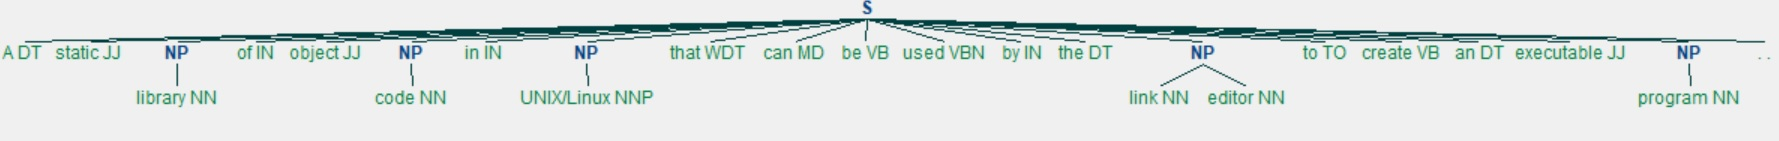

In [28]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):  range(1:20806)
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[1:20806])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
            
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)  

#ดึง noun จาก 2 noun phrase
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN", "NNP"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags
    
find_noun_phrases(result)
result.draw()

('is', 'VBZ')
('an', 'DT')
('given', 'VBN')
('to', 'TO')
('application', 'VB')
('on', 'IN')
('.', '.')


In [29]:
result.pprint()

(S
  (NP .app/NN)
  is/VBZ
  an/DT
  (NP extension/NN)
  given/VBN
  to/TO
  application/VB
  (NP bundles/NNS)
  on/IN
  (NP Mac/NNP OS/NNP X/NNP)
  ./.)


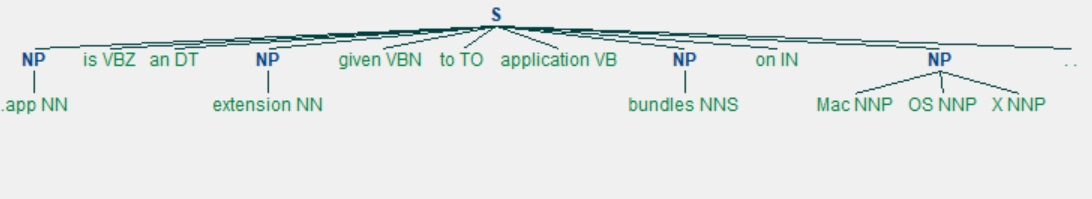

In [30]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[2])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
            
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
#ดึง noun จาก 2 noun phrase
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN", "NNP"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags
            
find_noun_phrases(result)
result.draw()

('A', 'DT')
('(', '(')
('typically', 'RB')
('short', 'RB')
(')', ')')
(',', ',')
('executed', 'VBD')
('when', 'WRB')
('a', 'DT')
('on', 'IN')
('.', '.')


In [31]:
result.pprint()

(S
  A/DT
  (/(
  typically/RB
  short/RB
  )/)
  (NP shell/NN script/NN)
  ,/,
  executed/VBD
  when/WRB
  a/DT
  (NP bash/NN user/NN logs/NNS)
  on/IN
  ./.)


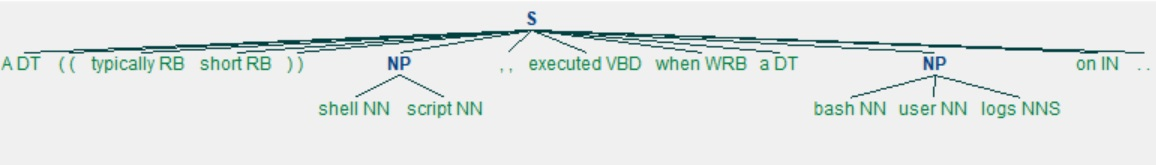

In [32]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[3])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN", "NNP"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags    

find_noun_phrases(result)

('are', 'VBP')
('the', 'DT')
('used', 'VBN')
('by', 'IN')
('the', 'DT')
('.', '.')


['Class files', 'format', 'Java Virtual Machine']

In [33]:
result.pprint()

(S
  (NP Class/NN files/NNS)
  are/VBP
  the/DT
  (NP format/NN)
  used/VBN
  by/IN
  the/DT
  (NP Java/NNP Virtual/NNP Machine/NNP)
  ./.)


In [34]:
result.draw()

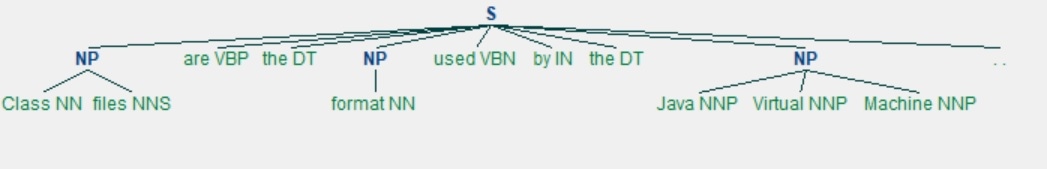

In [35]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[1033])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
               
find_noun_phrases(result)
result.draw()

('Anonymous', 'JJ')
('are', 'VBP')
('local', 'JJ')
('that', 'WDT')
('are', 'VBP')
('declared', 'VBN')
('and', 'CC')
('instantiated', 'VBN')
('.', '.')


In [36]:
result.pprint()

(S
  Anonymous/JJ
  (NP Inner/NNP Classes/NNS)
  are/VBP
  local/JJ
  (NP classes/NNS)
  that/WDT
  are/VBP
  declared/VBN
  and/CC
  instantiated/VBN
  (NP inline/NN)
  ./.)


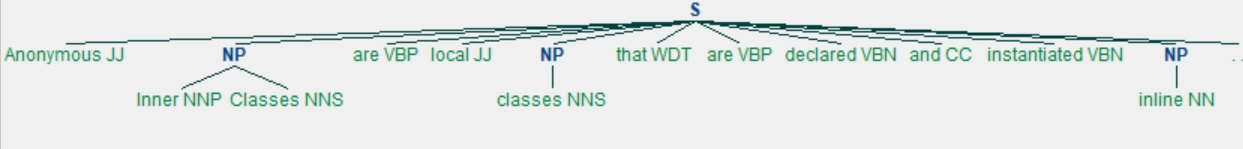

In [37]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[7000])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
find_noun_phrases(result)
result.draw()

('is', 'VBZ')
('a', 'DT')
('that', 'WDT')
('provides', 'VBZ')
('with', 'IN')
('.', '.')


In [38]:
result.pprint()

(S
  (NP Flask-MongoEngine/NNP)
  is/VBZ
  a/DT
  (NP Flask/NNP extension/NN)
  that/WDT
  provides/VBZ
  (NP integration/NN)
  with/IN
  (NP MongoEngine/NNP)
  ./.)


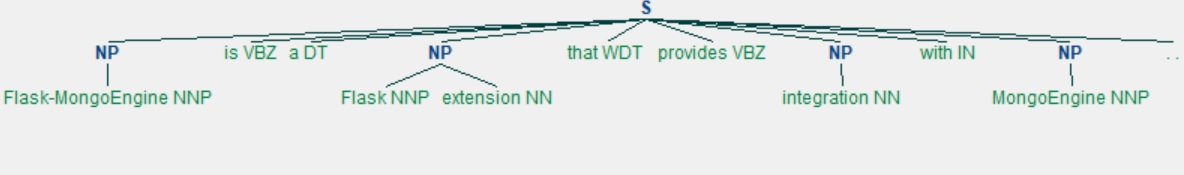

In [39]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[9090])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
            
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs
            
find_noun_phrases(result)
result.draw()

('10', 'CD')
('is', 'VBZ')
('a', 'DT')
('to', 'TO')
('a', 'DT')
('specific', 'JJ')
('of', 'IN')
('.', '.')


In [40]:
result.pprint()

(S
  (NP Indy/NNP)
  10/CD
  is/VBZ
  a/DT
  (NP reference/NN)
  to/TO
  a/DT
  specific/JJ
  (NP version/NN)
  of/IN
  (NP Indy/NNP)
  ./.)


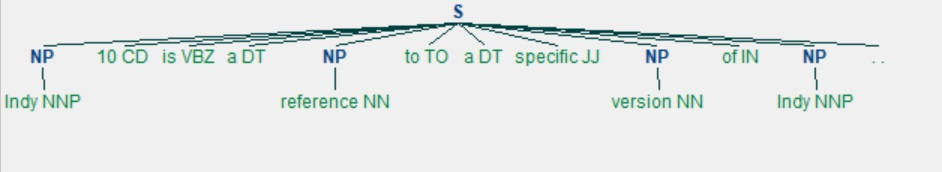

In [41]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[11000])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
                
find_noun_phrases(result)
result.draw()

('is', 'VBZ')
('an', 'DT')
('R', 'JJ')
('that', 'WDT')
('makes', 'VBZ')
('it', 'PRP')
('easier', 'JJR')
('to', 'TO')
('work', 'VB')
('with', 'IN')
('and', 'CC')
('.', '.')


In [42]:
result.pprint()

(S
  (NP lubridate/NN)
  is/VBZ
  an/DT
  R/JJ
  (NP package/NN)
  that/WDT
  makes/VBZ
  it/PRP
  easier/JJR
  to/TO
  work/VB
  with/IN
  (NP dates/NNS)
  and/CC
  (NP time/NN objects/NNS)
  ./.)


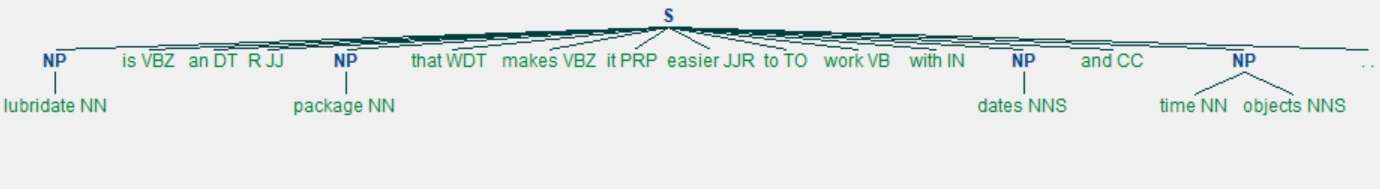

In [43]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[16000])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
                
find_noun_phrases(result)
result.draw()

('are', 'VBP')
('a', 'DT')
('powerful', 'JJ')
('to', 'TO')
('map', 'VB')
('a', 'DT')
('certain', 'JJ')
('to', 'TO')
('an', 'DT')
('according', 'VBG')
('to', 'TO')
('a', 'DT')
('defined', 'JJ')
('.', '.')


In [44]:
result.pprint()

(S
  (NP Rust/NNP macros/NNS)
  are/VBP
  a/DT
  powerful/JJ
  (NP tool/NN)
  to/TO
  map/VB
  a/DT
  certain/JJ
  (NP input/NN sequence/NN)
  to/TO
  an/DT
  (NP output/NN sequence/NN)
  according/VBG
  to/TO
  a/DT
  defined/JJ
  (NP procedure/NN)
  ./.)


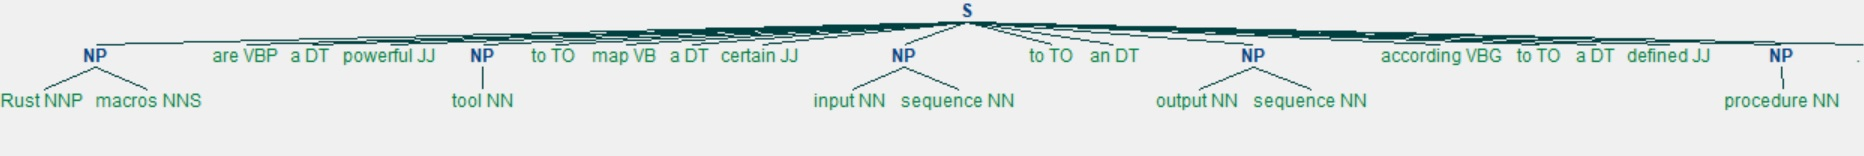

In [45]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[19000])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
                
find_noun_phrases(result)
result.draw()

('The', 'DT')
('of', 'IN')
('to', 'TO')
('display', 'VB')
('for', 'IN')
('a', 'DT')
('given', 'VBN')
('text-based', 'JJ')
('in', 'IN')
('.', '.')


In [46]:
result.pprint()

(S
  The/DT
  (NP type/NN)
  of/IN
  (NP keyboard/NN)
  to/TO
  display/VB
  for/IN
  a/DT
  given/VBN
  text-based/JJ
  (NP view/NN)
  in/IN
  (NP iOS/NN)
  ./.)


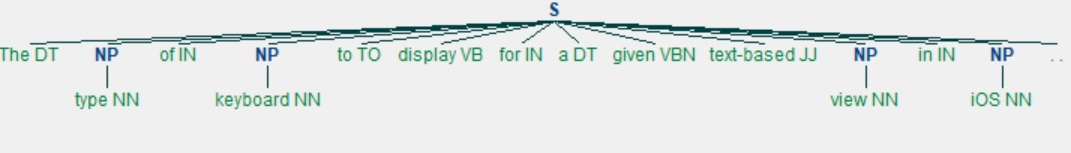

In [47]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[19800])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
find_noun_phrases(result)
result.draw()

('is', 'VBZ')
('an', 'DT')
('adapter-based', 'JJ')
('for', 'IN')
('.', '.')
('It', 'PRP')
('is', 'VBZ')
('included', 'VBN')
('with', 'IN')
('the', 'DT')
('.', '.')


In [48]:
result.pprint()

(S
  (NP Waterline/NNP)
  is/VBZ
  an/DT
  adapter-based/JJ
  (NP ORM/NNP)
  for/IN
  (NP Node/NNP)
  ./.
  It/PRP
  is/VBZ
  included/VBN
  with/IN
  the/DT
  (NP Sails.js/NNP framework/NN)
  ./.)


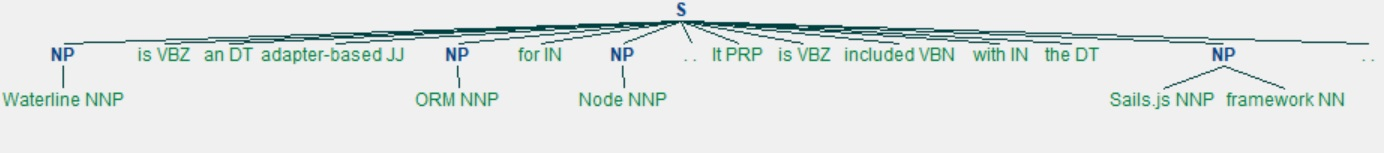

In [49]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[19900])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
    
find_noun_phrases(result)
result.draw()

('is', 'VBZ')
('the', 'DT')
('for', 'IN')
('interacting', 'VBG')
('with', 'IN')
('.', '.')
('for', 'IN')
('involving', 'VBG')
('.', '.')


In [50]:
result.pprint()

(S
  (NP Web3/NNP)
  is/VBZ
  the/DT
  (NP JavaScript/NNP framework/NN)
  for/IN
  interacting/VBG
  with/IN
  (NP Ethereum/NNP blockchain/NN)
  ./.
  (NP Use/NNP web3/NN)
  for/IN
  (NP questions/NNS)
  involving/VBG
  (NP Ethereum/NNP Web3/NNP framework/NN)
  ./.)


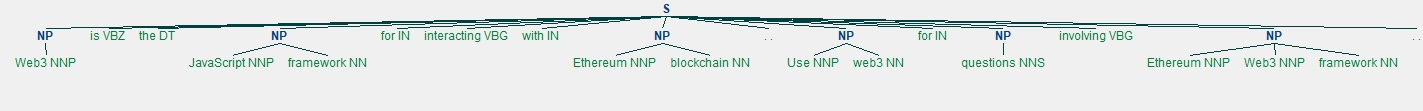

In [51]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[20550])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
find_noun_phrases(result)

result.draw()


('A', 'DT')
('for', 'IN')


In [52]:
result.pprint()

(S A/DT (NP XMPP/Jabber/NNP library/NN) for/IN (NP ruby/NN))


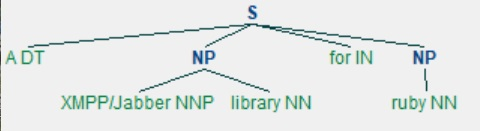

In [53]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[20750])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
                
find_noun_phrases(result)

result.draw()


('is', 'VBZ')
('a', 'DT')
('minimalist', 'JJ')
('for', 'IN')
('modern', 'JJ')
(',', ',')
('with', 'IN')
('a', 'DT')
('jQuery-compatible', 'JJ')
('.', '.')


In [54]:
result.pprint()

(S
  (NP Zepto.js/NNP)
  is/VBZ
  a/DT
  minimalist/JJ
  (NP JavaScript/NNP framework/NN)
  for/IN
  modern/JJ
  (NP browsers/NNS)
  ,/,
  with/IN
  a/DT
  jQuery-compatible/JJ
  (NP syntax/NN)
  ./.)


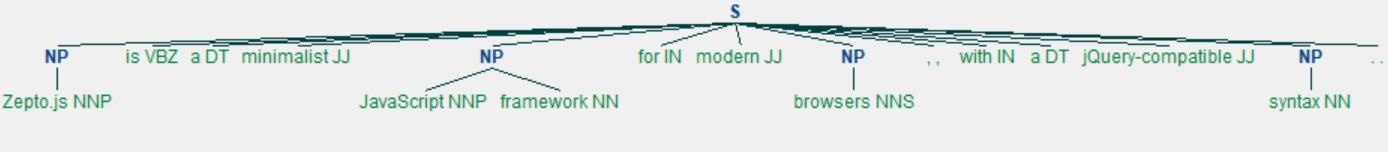

In [55]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[20200])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
find_noun_phrases(result)

result.draw()

('regarding', 'VBG')
('-', ':')
('a', 'DT')
('for', 'IN')
('the', 'DT')


In [56]:
result.pprint()

(S
  (NP Question/NN)
  regarding/VBG
  (NP Wiring/NNP Pi/NNP)
  -/:
  a/DT
  (NP GPIO/NNP Interface/NNP library/NN)
  for/IN
  the/DT
  (NP Raspberry/NNP Pi/NNP))


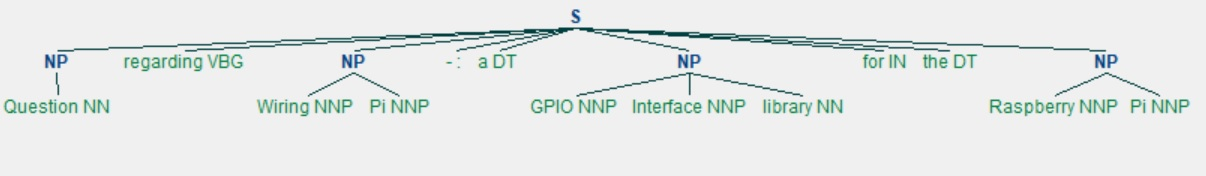

In [57]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[20300])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
                
find_noun_phrases(result)

result.pprint()

(',', ',')
('or', 'CC')
(',', ',')
('is', 'VBZ')
('a', 'DT')
('for', 'IN')
('rendering', 'VBG')
('user', 'JJ')
('in', 'IN')
('Windows-based', 'JJ')
('.', '.')
(S
  (NP Windows/NNP Presentation/NNP Foundation/NNP)
  ,/,
  or/CC
  (NP WPF/NNP)
  ,/,
  is/VBZ
  a/DT
  (NP subsystem/NN)
  for/IN
  rendering/VBG
  user/JJ
  (NP interfaces/NNS)
  in/IN
  Windows-based/JJ
  (NP applications/NNS)
  ./.)


In [58]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[2030])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs
            
find_noun_phrases(result)

result.pprint()

('Binary', 'JJ')
('is', 'VBZ')
('an', 'DT')
('efficient', 'JJ')
('for', 'IN')
('finding', 'VBG')
('an', 'DT')
('in', 'IN')
('a', 'DT')
('sorted', 'JJ')
('.', '.')
('The', 'DT')
('basic', 'JJ')
('is', 'VBZ')
('to', 'TO')
('cut', 'VB')
('the', 'DT')
('in', 'IN')
('in', 'IN')
('each', 'DT')
('.', '.')
('The', 'DT')
('of', 'IN')
('the', 'DT')
('is', 'VBZ')
('(', '(')
('(', '(')
('n', 'JJ')
(')', ')')
(')', ')')
('.', '.')
(S
  Binary/JJ
  (NP search/NN)
  is/VBZ
  an/DT
  efficient/JJ
  (NP algorithm/NN)
  for/IN
  finding/VBG
  an/DT
  (NP element/NN)
  in/IN
  a/DT
  sorted/JJ
  (NP array/NN)
  ./.
  The/DT
  basic/JJ
  (NP idea/NN)
  is/VBZ
  to/TO
  cut/VB
  the/DT
  (NP search/NN space/NN)
  in/IN
  (NP half/NN)
  in/IN
  each/DT
  (NP step/NN)
  ./.
  The/DT
  (NP complexity/NN)
  of/IN
  the/DT
  (NP algorithm/NN)
  is/VBZ
  (NP O/NNP)
  (/(
  (NP log/NN)
  (/(
  n/JJ
  )/)
  )/)
  ./.)


In [59]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[300])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
find_noun_phrases(result)

result.pprint()

('provided', 'VBD')
('a', 'DT')
('lightweight', 'JJ')
('front', 'JJ')
('to', 'TO')
('with', 'IN')
('from', 'IN')
('2000', 'CD')
('to', 'TO')
('2010', 'CD')
('.', '.')
('Note', 'VB')
('was', 'VBD')
('deprecated', 'VBN')
('in', 'IN')
('2010', 'CD')
('and', 'CC')
('is', 'VBZ')
('unsupported', 'JJ')
('as', 'IN')
('of', 'IN')
('2013', 'CD')
('.', '.')
(S
  (NP Access/NNP Data/NNP Projects/NNP)
  provided/VBD
  a/DT
  lightweight/JJ
  front/JJ
  (NP end/NN)
  to/TO
  (NP Microsoft/NNP SQL/NNP Server/NNP)
  with/IN
  (NP Access/NNP versions/NNS)
  from/IN
  2000/CD
  to/TO
  2010/CD
  ./.
  Note/VB
  (NP ADP/NNP)
  was/VBD
  deprecated/VBN
  in/IN
  (NP Access/NNP)
  2010/CD
  and/CC
  is/VBZ
  unsupported/JJ
  as/IN
  of/IN
  (NP Access/NNP)
  2013/CD
  ./.)


In [60]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[200])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs
            
find_noun_phrases(result)

result.pprint()

('is', 'VBZ')
('a', 'DT')
('for', 'IN')
('Visual', 'JJ')
('designed', 'VBN')
('and', 'CC')
('marketed', 'VBN')
('by', 'IN')
('.', '.')
('It', 'PRP')
('offers', 'VBZ')
('three', 'CD')
('different', 'JJ')
('of', 'IN')
(':', ':')
('traditional', 'JJ')
('banded', 'VBD')
('with', 'IN')
('event-based', 'JJ')
('or', 'CC')
('for', 'IN')
('fine-tuning', 'JJ')
('like', 'IN')
('or', 'CC')
('Reports', 'NNPS')
(',', ',')
('page-based', 'JJ')
('for', 'IN')
('fixed', 'VBN')
(',', ',')
('and', 'CC')
('for', 'IN')
('more', 'JJR')
(',', ',')
('interactive', 'JJ')
('.', '.')
('It', 'PRP')
('is', 'VBZ')
('designed', 'VBN')
('for', 'IN')
('in', 'IN')
('or', 'CC')
('and', 'CC')
('.', '.')
(S
  (NP ActiveReports/NNS)
  is/VBZ
  a/DT
  (NP reporting/NN framework/NN)
  for/IN
  Visual/JJ
  (NP Studio/NNP programmers/NNS)
  designed/VBN
  and/CC
  marketed/VBN
  by/IN
  (NP GrapeCity/NNP)
  ./.
  It/PRP
  offers/VBZ
  three/CD
  different/JJ
  (NP types/NNS)
  of/IN
  (NP reports/NNS)
  :/:
  traditional/JJ
  b

In [61]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[500])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
                
find_noun_phrases(result)

result.pprint()

('(', '(')
(')', ')')
('is', 'VBZ')
('a', 'DT')
('web', 'JJ')
('that', 'WDT')
('enables', 'VBZ')
(',', ',')
(',', ',')
(',', ',')
('and', 'CC')
('to', 'TO')
('easily', 'RB')
('and', 'CC')
('cost-effectively', 'JJ')
('vast', 'JJ')
('of', 'IN')
('.', '.')
('It', 'PRP')
('utilizes', 'VBZ')
('a', 'DT')
('hosted', 'JJ')
('running', 'VBG')
('on', 'IN')
('the', 'DT')
('web-scale', 'JJ')
('of', 'IN')
('(', '(')
(')', ')')
('and', 'CC')
('(', '(')
(')', ')')
('.', '.')
(S
  (NP Amazon/NNP Elastic/NNP MapReduce/NNP)
  (/(
  (NP Amazon/NNP EMR/NNP)
  )/)
  is/VBZ
  a/DT
  web/JJ
  (NP service/NN)
  that/WDT
  enables/VBZ
  (NP businesses/NNS)
  ,/,
  (NP researchers/NNS)
  ,/,
  (NP data/NNS analysts/NNS)
  ,/,
  and/CC
  (NP developers/NNS)
  to/TO
  easily/RB
  and/CC
  cost-effectively/JJ
  (NP process/NN)
  vast/JJ
  (NP amounts/NNS)
  of/IN
  (NP data/NNS)
  ./.
  It/PRP
  utilizes/VBZ
  a/DT
  hosted/JJ
  (NP Hadoop/NNP framework/NN)
  running/VBG
  on/IN
  the/DT
  web-scale/JJ
  (NP infra

In [62]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[90])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
                
find_noun_phrases(result)

result.pprint()

('Armed', 'VBN')
('(', '(')
(')', ')')
('of', 'IN')
('the', 'DT')
('in', 'IN')
('the', 'DT')
('.', '.')
(S
  Armed/VBN
  (NP Bear/NNP Common/NNP Lisp/NNP)
  (/(
  (NP ABCL/NNP)
  )/)
  (NP implementation/NN)
  of/IN
  the/DT
  (NP Common/NNP Lisp/NNP language/NN)
  in/IN
  the/DT
  (NP JVM/NNP)
  ./.)


In [63]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[20])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs
            
find_noun_phrases(result)

result.pprint()

('A', 'DT')
('of', 'IN')
('and', 'CC')
('compiled', 'VBD')
('into', 'IN')
('a', 'DT')
('binary', 'JJ')
(',', ',')
('written', 'VBN')
('in', 'IN')
('a', 'DT')
('.NET-specific', 'JJ')
('such', 'JJ')
('as', 'IN')
('#', '#')
('or', 'CC')
('.', '.')
(S
  A/DT
  (NP group/NN)
  of/IN
  (NP classes/NNS)
  and/CC
  (NP namespaces/NNS)
  compiled/VBD
  into/IN
  a/DT
  binary/JJ
  (NP file/NN)
  ,/,
  written/VBN
  in/IN
  a/DT
  .NET-specific/JJ
  (NP language/NN)
  such/JJ
  as/IN
  (NP C/NNP)
  #/#
  or/CC
  (NP VB.NET/NNP)
  ./.)


In [64]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[255])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
find_noun_phrases(result)

result.pprint()

('An', 'DT')
('addressing', 'VBG')
('specifies', 'VBZ')
('how', 'WRB')
('to', 'TO')
('calculate', 'VB')
('the', 'DT')
('effective', 'JJ')
('of', 'IN')
('an', 'DT')
('by', 'IN')
('using', 'VBG')
('held', 'VBN')
('in', 'IN')
('and/or', 'VBP')
('contained', 'VBN')
('within', 'IN')
('a', 'DT')
('or', 'CC')
('elsewhere', 'RB')
('.', '.')
(S
  An/DT
  addressing/VBG
  (NP mode/NN)
  specifies/VBZ
  how/WRB
  to/TO
  calculate/VB
  the/DT
  effective/JJ
  (NP memory/NN address/NN)
  of/IN
  an/DT
  (NP operand/NN)
  by/IN
  using/VBG
  (NP information/NN)
  held/VBN
  in/IN
  (NP registers/NNS)
  and/or/VBP
  (NP constants/NNS)
  contained/VBN
  within/IN
  a/DT
  (NP machine/NN instruction/NN)
  or/CC
  elsewhere/RB
  ./.)


In [65]:
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[403])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    

find_noun_phrases(result)

result.pprint()

('is', 'VBZ')
('an', 'DT')
('written', 'VBN')
('in', 'IN')
('.', '.')
(S
  (NP Alamofire/NNP)
  is/VBZ
  an/DT
  (NP HTTP/NNP networking/NN library/NN)
  written/VBN
  in/IN
  (NP Swift/NNP)
  ./.)


In [66]:
import nltk
grammar = "NP: {<NN|NNS|NNP>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[154])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
        
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
    # Generate_Result
    all_tags = []
    for node in result:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_tags.append((" ".join(NP), label))
        except AttributeError:
            all_tags.append(node)
    return all_tags

find_noun_phrases(result)

result.pprint()

('An', 'DT')
('(', '(')
(')', ')')
(',', ',')
('with', 'IN')
('to', 'TO')
('a', 'DT')
(',', ',')
('is', 'VBZ')
('a', 'DT')
('of', 'IN')
('attached', 'VBN')
('to', 'TO')
('an', 'DT')
('.', '.')
(S
  An/DT
  (NP access/NN control/NN list/NN)
  (/(
  (NP ACL/NNP)
  )/)
  ,/,
  with/IN
  (NP respect/NN)
  to/TO
  a/DT
  (NP computer/NN file/NN system/NN)
  ,/,
  is/VBZ
  a/DT
  (NP list/NN)
  of/IN
  (NP permissions/NNS)
  attached/VBN
  to/TO
  an/DT
  (NP object/NN)
  ./.)


In [67]:
#ดึง noun จาก 2 noun phrase
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN", "NNP"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags

# Relation Extraction
find library, extension, shell/script/shell script, format


In [69]:
import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


In [105]:
grammar = "NP: {<NN|NNS>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[677])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
            
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
#ดึง noun จาก 2 noun phrase
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN", "NNP"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags
            
find_noun_phrases(result)
result.draw()

('A', 'DT')
('in', 'IN')
('the', 'DT')
('Android', 'NNP')
('SDK', 'NNP')
('that', 'WDT')
('provides', 'VBZ')
('to', 'TO')
('create', 'VB')
(',', ',')
('recognize', 'VB')
(',', ',')
('and', 'CC')
('save', 'VB')
('.', '.')
('are', 'VBP')
('on', 'IN')
('the', 'DT')
('that', 'WDT')
('to', 'TO')
('specific', 'JJ')
('.', '.')


In [107]:
grammar = "NP: {<NN|NNS>+}"
cp = nltk.RegexpParser(grammar)


for i in range(len(tagwiki['excerpt'])):
    sentences =  tagwiki['excerpt']

tokens_first_sent = nltk.word_tokenize(sentences[0])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")
            
def find_noun_phrases(t):
    all_NPs = []
    for node in t:
        try:
            label = node.label()
            NP = [x[0] for x in node.leaves()]
            all_NPs.append(" ".join(NP))
        except AttributeError:
            print(node)
            continue
    return all_NPs

def parse_noun_phrase(excerpt, grammar):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    
#ดึง noun จาก 2 noun phrase
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags
            
find_noun_phrases(result)
result.draw()

('A', 'DT')
('static', 'JJ')
('of', 'IN')
('object', 'JJ')
('in', 'IN')
('UNIX/Linux', 'NNP')
('that', 'WDT')
('can', 'MD')
('be', 'VB')
('used', 'VBN')
('by', 'IN')
('the', 'DT')
('to', 'TO')
('create', 'VB')
('an', 'DT')
('executable', 'JJ')
('.', '.')


In [109]:
import string
extract_nn(sentences[0], grammar="NP: {<NN|NNS>+}", max_num = 2)

['library', 'code']

In [116]:
import string
extract_nn(sentences[1556], grammar="NP: {<NN|NNS>+}", max_num = 2)

['Part', 'platform']

In [111]:
import string
sentences[1556]

'Part of the Aurelia platform and contains an extensible HTML templating engine supporting databinding, custom elements, attached behaviors and more.'

In [117]:
import string
print(sentences[109])
extract_nn(sentences[109], grammar="NP: {<NN|NNS>+}", max_num = 2)

Java abstract class which provides default implementations for most of the methods in the TableModel interface. 


['abstract', 'class', 'default', 'implementations']

In [118]:
import string
print(sentences[3000])
extract_nn(sentences[3000], grammar="NP: {<NN|NNS>+}", max_num = 2)

Bitrix is a CMS written in php


['php']

In [119]:
import string
print(sentences[30])
extract_nn(sentences[30], grammar="NP: {<NN|NNS>+}", max_num = 2)

.NET Remoting is a legacy technology of the .NET Framework for distributed applications. For development of new distributed applications it is recommened to use Windows Communication Foundation (WCF)


['.NET', 'legacy', 'technology']

In [120]:
import string
print(sentences[i])
extract_nn(sentences[i], grammar="NP: {<NN|NNS>+}", max_num = 2)

Zynq refers to the Zynq-7000 family of SoCs. A Zync device is a fully featured ARM processor-based system-on-chip.


['refers', 'family']

In [ ]:
nn = []
pd.to_json()

In [148]:
import string
import re
import pandas as pd

grammar = "NP: {<NN|NNS>+}"
cp = nltk.RegexpParser(grammar)

   
for i in tagwiki.itertuples:
    sentences =  tagwiki['excerpt']
    
tokens_first_sent = nltk.word_tokenize(sentences[i])
tokens_with_tags = nltk.pos_tag(tokens_first_sent) 
result = cp.parse(tokens_with_tags)
        
#ดึง noun จาก 2 noun phrase
def extract_nn(excerpt, grammar, max_num = 2):
    # Parse tags
    cp = nltk.RegexpParser(grammar)
    sentences = nltk.sent_tokenize(excerpt)
    first_sent_tokens = nltk.word_tokenize(sentences[0])
    first_sent_tokens = [token for token in first_sent_tokens if token not in string.punctuation]
    first_sent_tags = nltk.pos_tag(first_sent_tokens)
    result = cp.parse(first_sent_tags)
    # Generate_Result
    all_tags = []
    count = 0
    for node in result:
        try:
            label = node.label()
            if (label == "NP") and (count < max_num):
                leaf_nodes = [x[0] for x in node.leaves() if x[1] in ["NNS", "NN"]]
                all_tags += leaf_nodes
                count += 1
        except AttributeError:
            continue
    return all_tags
            
find_noun_phrases(result)
extract_nn(sentences[i], grammar="NP: {<NN|NNS>+}", max_num = 2)

TypeError: 'method' object is not iterable